In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jax import grad, hessian 
from jax import numpy as jnp
from jax.scipy.special import logsumexp
from scipy.optimize import minimize

In [19]:
# Load data
data = pd.read_csv('survey.csv')  # Replace with your file name
ages = jnp.array(data['age'].values)       # Convert to jnp.array
responses = jnp.array(data['recognized_it'].values)  # Convert to jnp.array

In [20]:
# Logistic function for probability
def logistic(x, beta_0, beta_1):
    return 1 / (1 + jnp.exp(-(beta_0 + beta_1 * x)))

# Negative log-likelihood with precision handling
def neg_log_likelihood(params):
    beta_0, beta_1 = params
    log_p_yes = responses * jnp.log(logistic(ages, beta_0, beta_1) + 1e-10)
    log_p_no = (1 - responses) * jnp.log(1 - logistic(ages, beta_0, beta_1) + 1e-10)
    return -jnp.sum(log_p_yes + log_p_no)

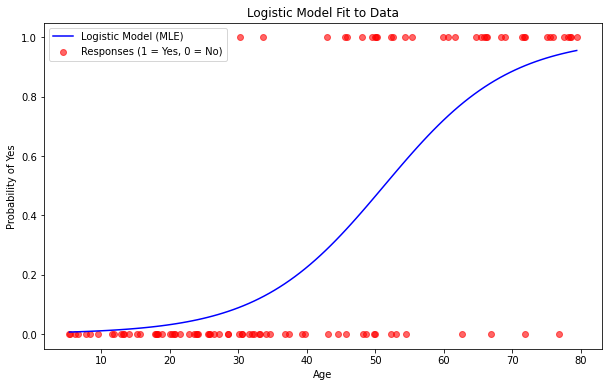

MLE Estimates:
Beta 0: -5.6202372486973715
Beta 1: 0.10956347487134308
Covariance Matrix:
[[ 1.1186342e+00 -2.1119179e-02]
 [-2.1119179e-02  4.3467470e-04]]


In [33]:
# Use JAX's gradient and Hessian for efficient computation
gradient = grad(neg_log_likelihood)
hessian_matrix = hessian(neg_log_likelihood)

# Initial parameter guess
initial_params = jnp.array([-5, 0.1])

# Minimize the negative log-likelihood
result = minimize(lambda params: np.array(neg_log_likelihood(params)), initial_params, jac=gradient, method='BFGS')
beta_0_mle, beta_1_mle = result.x

# Covariance matrix (inverse of the Hessian at the MLE)
cov_matrix = np.linalg.inv(np.array(hessian_matrix(result.x)))

# Plot the logistic curve
ages_range = np.linspace(ages.min(), ages.max(), 100)
logistic_curve = logistic(ages_range, beta_0_mle, beta_1_mle)

plt.figure(figsize=(10, 6))
plt.plot(ages_range, logistic_curve, label="Logistic Model (MLE)", color="blue")
plt.scatter(ages, responses, color='red', alpha=0.6, label="Responses (1 = Yes, 0 = No)")
plt.xlabel("Age")
plt.ylabel("Probability of Yes")
plt.legend()
plt.title("Logistic Model Fit to Data")
plt.show()

# Print results
print("MLE Estimates:")
print("Beta 0:", beta_0_mle)
print("Beta 1:", beta_1_mle)
print("Covariance Matrix:")
print(cov_matrix)
